# Results

We experiment on many settings of our new proposed method, this page is to summary the result for further improvment. The settings we apply in our mechanism (ExpLOSS) are:

1. Origin: Original without residual, output shape is D
2. Res: Residual connection apply on Origin
3. FeatOrigin: Origin with modifcation to output the features with shape D, H, W. This config can be leveraged to apply in intermidate layers of model


Model | Val loss | Val acc | Test loss | Test acc
------|----------|---------|-----------|----------
Origin - b64 (imgsize 64x64) + augmentation| 0.3313 | 0.9089 | 0.2685 | 0.9156
Origin - b64| 0.3116 | 0.9092 | 0.3059 | 0.9072 
Res - b64| 0.3251 | 0.9220 | 0.2122 | 0.9323
Res - b256 |      | 0.9780 | 0.0847 | 0.9805
FeatOrigin - last1conv | 0.2971 | 0.9242 | 0.2669 | 0.9259
FeatOrigin - last1conv (sigmoid) | 0.3493 | 0.9072 | 0.2977 | 0.9217
FeatOrigin - last1conv (l2norm - all) | 0.3304 | 0.9192 | 0.2895 | 0.9175
FeatOrigin - last1conv (l2norm - row) | 0.3527 | 0.8986 | 0.3070 | 0.9142
FeatOrigin - last1conv (l2norm after mask - all) | 0.3474 | 0.9139 | 0.2502 | 0.9211
FeatOrigin - last2convs | 0.4187 | 0.9069 | 0.3823 | 0.9025

## Cross validation

The experiment is conducted based on Res - b64, with 5 Folds train - test

Fold | Test loss | Test acc
-----|-----------|---------
1 | 0.2403 | 0.9281
2 | 0.2165 | 0.9202
3 | 0.1744 | 0.9423
4 | 0.2532 | 0.9122
5 | 0.2775 | 0.9175

## CIFAR 10 benchmark training from scratch
> Outperform the top-1 model training from scratch (based on PapersWithCode)

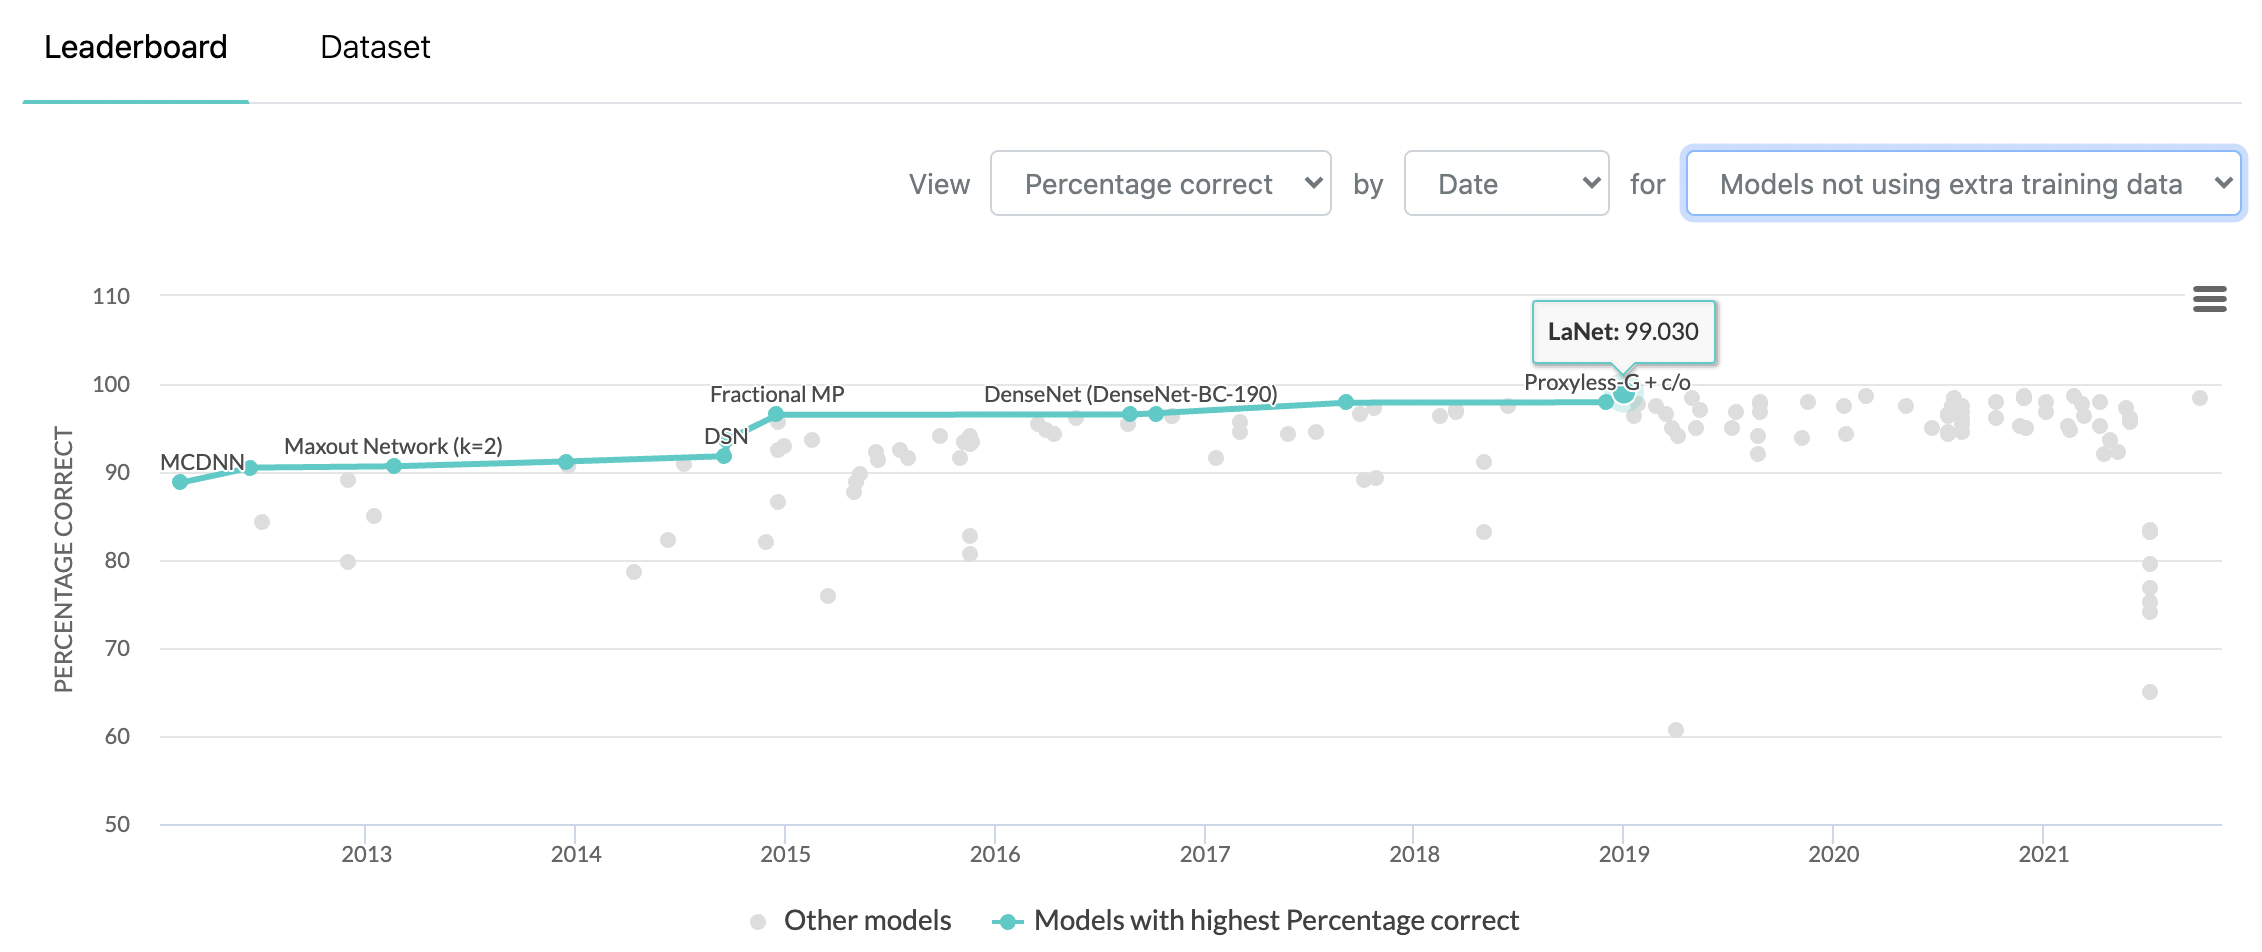

test loss: 0.0410 | test_acc: 0.9924

## CIFAR 100 benchmark training from scratch

> Outperform top-1 model training from scratch (based on PapersWithCode)

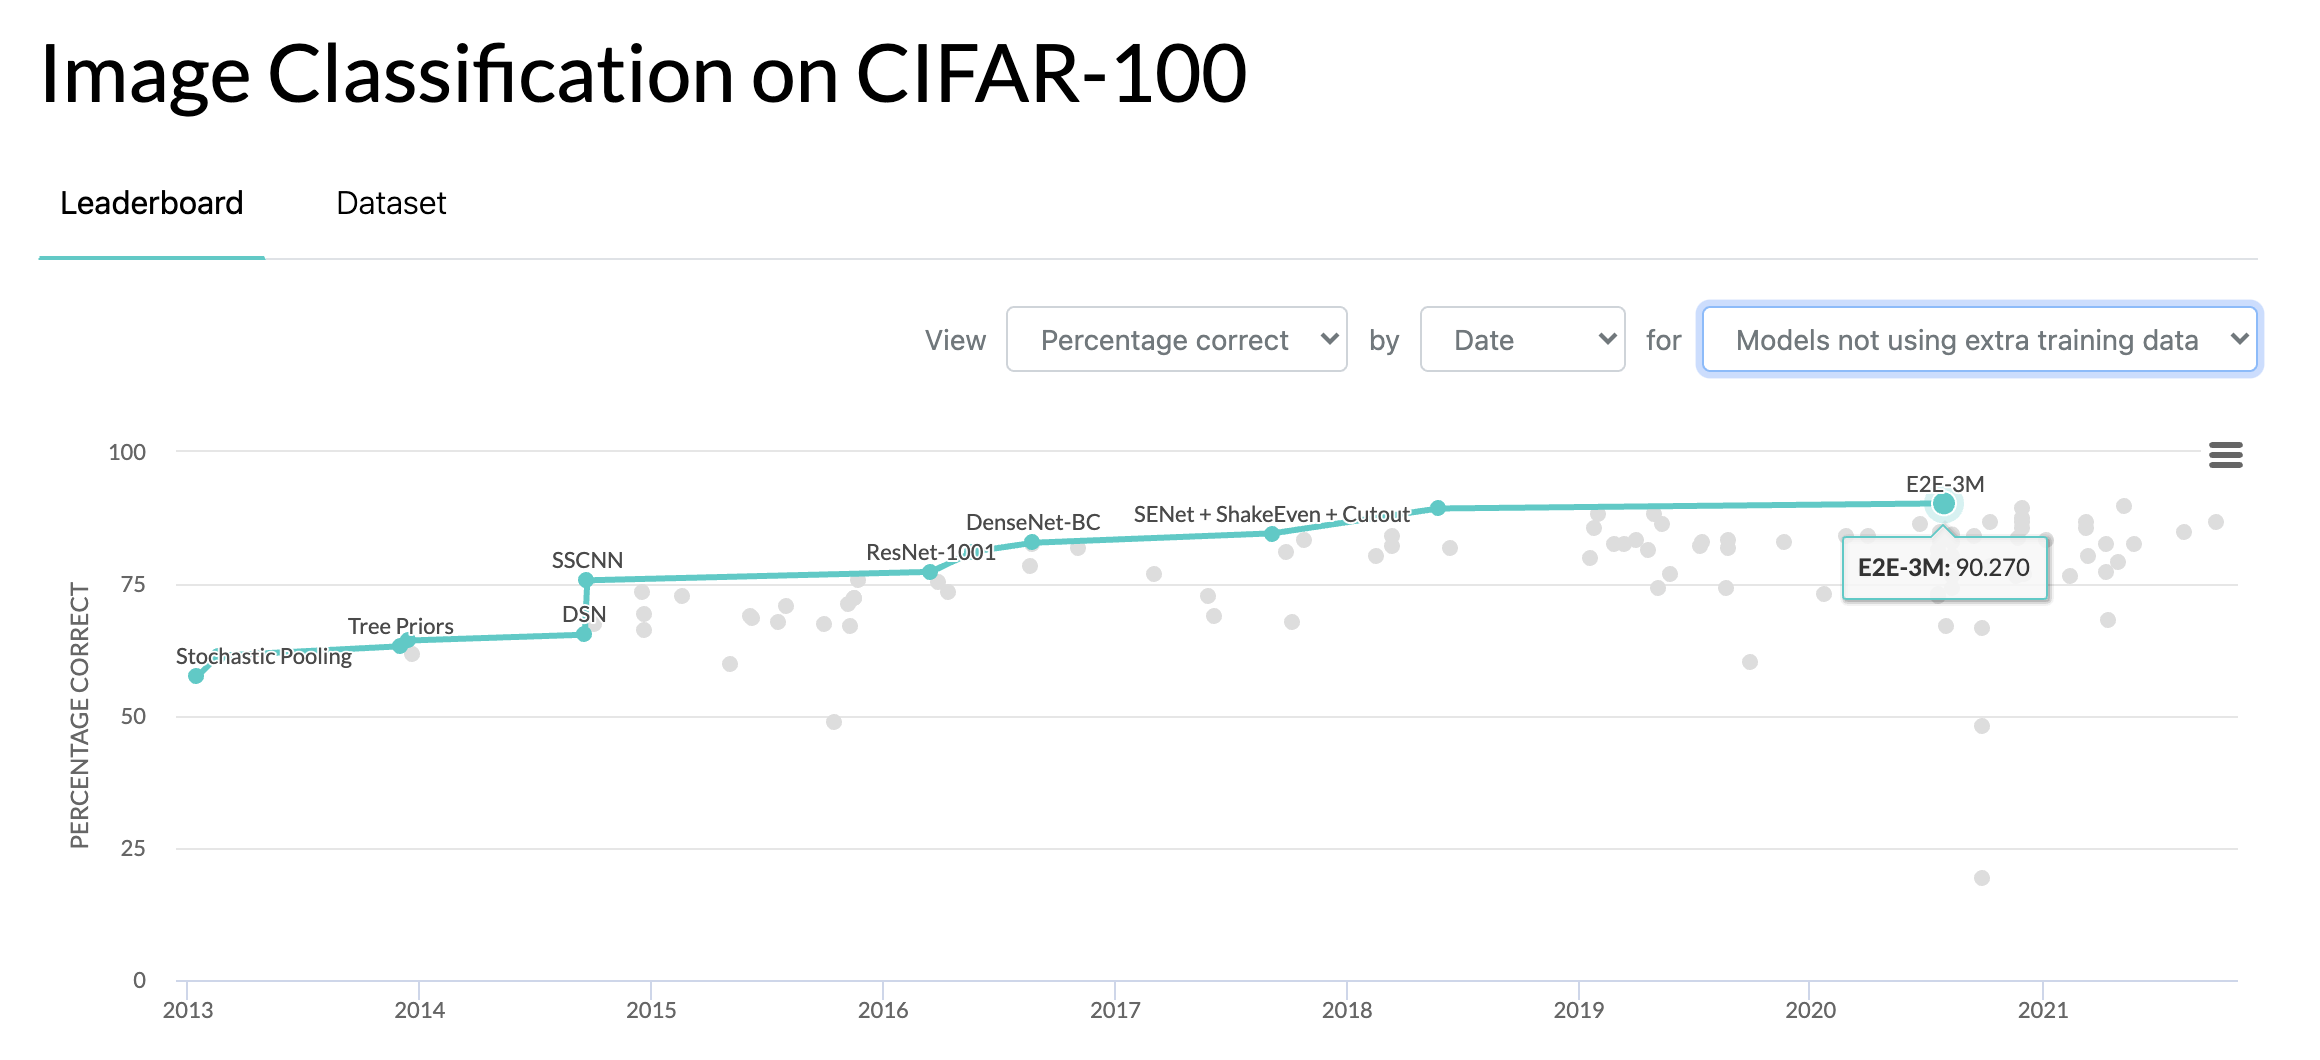

test_loss: 0.3539 | test_acc: 0.9031

# Representations

Original VGG
<img src = "exploss/sVGG_tsne.png" width=500/>

Origin
<img src = "exploss/sVGG_exploss_samelabelsmask_tsne.png" width=600/>

Residual origin
<img src = "exploss_more/sVGG_opt_residualexploss_originalimgsize_noaugmentation_tsne.png" width=600/>

# Training progress

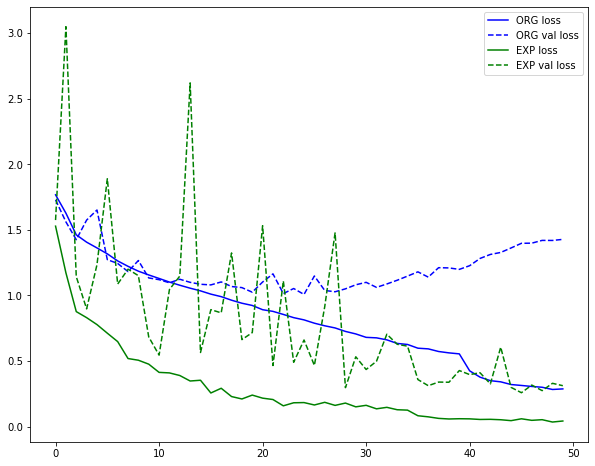

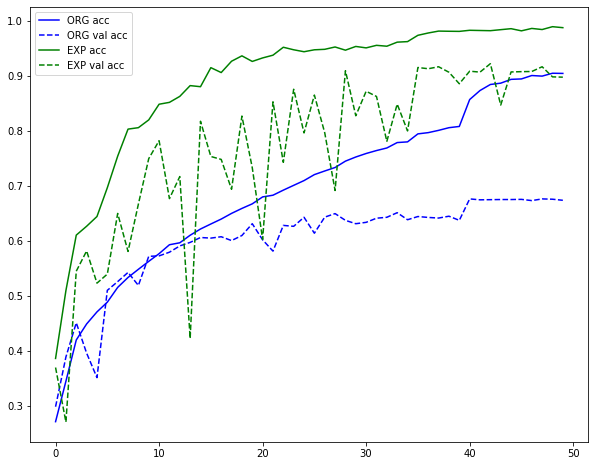

In [1]:
import pickle
import matplotlib.pyplot as plt

original = pickle.load(open('exploss/sVGG_hist.hdf5' ,'rb'))
exp = pickle.load(open('exploss_more/sVGG_opt_residualexploss_originalimgsize_noaugmentation_hist.hdf5', 'rb'))

# loss
plt.figure(figsize=(10,8))
plt.plot([k[0] for k in original], 'b-', label='ORG loss')
plt.plot([k[1] for k in original], 'b--', label='ORG val loss')

plt.plot([k[0] for k in exp], 'g-', label='EXP loss')
plt.plot([k[1] for k in exp], 'g--', label='EXP val loss')

plt.legend()
plt.show()

# accuracy
plt.figure(figsize=(10,8))
plt.plot([k[-2] for k in original], 'b-', label='ORG acc')
plt.plot([k[-1] for k in original], 'b--', label='ORG val acc')

plt.plot([k[-2] for k in exp], 'g-', label='EXP acc')
plt.plot([k[-1] for k in exp], 'g--', label='EXP val acc')

plt.legend()
plt.show()



# Challenge of new proposed method

**Problem 1** The proposed method heavily depends on the batch size. Particularly, large batch size leads to large combination of samples. Reducing batch size also decreases the performance in accuracy

<!-- **Possible solutions**


1. Fix the number of samples for each kinds of labels
> Example: a 64-batch data with 7 different kind of labels. If we choose a fix size of data to be involved in the attention calculation, it will no longer depend on the batch size anymore
 -->
 
 
 **Problem 2** If the dataset has the significant variance of samples owning the same labels, it makes the model hard to converge. The possible reason is that our proposed architecture weights the samples of same labels using their similarity (dot-product), but these samples is obviously different due to the high variance.
 
 This is also can be seen as a effective way to further classify each labels into their smaller groups. However, if these features are too far away from each others, it can make the model hard to converge
 
> Solution 1:  Add the additional loss to maximize the similarity of samples with samle labels and minimize ones with different labels

> Solution 2: Add features which are dedicated to each labels and always appear in the model as bridges to connect part

## Problem 2 - Solution 1

The model successfully narrow down the dissimilarity of features. However, the distance among groups shown in representation is still significant, which make the model hard to converge. The results show that even the features are narrow down, the loss is still very high

Original (without sim loss)
<img src = "exploss_benchamrk_rafdb/resExploss_originalRAFDB_resnet50_tsne.png" width=600/>

Add sim loss
<img src = "exploss_benchamrk_rafdb/resExploss_simloss_originalRAFDB_resnet50_tsne.png" width=600/>
